In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import keras
#mpl.use('pdf')
import sys
sys.path.append("../")
import copy
from Plotting.generate_database import ResultsDatabaseGenerator
from common_packages.utilities import get_equivalent_classical_layer_size, get_num_parameters_per_quantum_layer
from quantum_base import Net as Net_orig
from quantum_base_kerr import Net as Net_kerr
from data import generate_synthetic_dataset_easy
from Plotting.Plot import BasicPlot, MultiPlot
tf.compat.v1.enable_eager_execution()
import pandas as pd
import seaborn as sns
from CalculateFisherInformation import Calculate_Fisher_Information_Matrix
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]

colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.linewidth"] = 0.5

tf.random.set_seed(None)

%load_ext autoreload
%autoreload 2

2023-10-15 23:46:12.828052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64:
2023-10-15 23:46:12.828097: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Second Method
Taken from https://github.com/amyami187/effective_dimension/blob/v1.0.0/effective_dimension/classical_nn.py

In [5]:
model_func = lambda : Net_kerr(
    network_type='classical',
    n_layers=4,
    num_qumodes=2,
    cutoff=3,
    max_initial_weight=0.2
)

paper_initializer = keras.initializers.RandomUniform(minval=0, maxval=1)

# model_func = lambda : keras.models.Sequential([
#         keras.layers.Dense(4, activation='leaky_relu', kernel_initializer=paper_initializer, use_bias=False),
#         keras.layers.Dense(4, activation='leaky_relu', kernel_initializer=paper_initializer, use_bias=False),
#         keras.layers.Dense(2, activation='tanh', kernel_initializer=paper_initializer, use_bias=False),
#         keras.layers.Softmax()
#     ])

x_train = np.random.uniform(0, 1, size=[100, 2])

model = model_func()
model(x_train[0:1])

fisher_obj = Calculate_Fisher_Information_Matrix(
    model_func=model_func,
    x_train=x_train,
    n_iter=100,
)

fhat = fisher_obj.get_fhat()
fhat_eigvals = []

for i in range(fhat.shape[0]):
    fhat_eigvals.append(np.linalg.eigvals(fhat[i]).real)
fhat_eigvals = np.mean(np.array(fhat_eigvals), axis=0)
print(fhat_eigvals.shape)

Calculating Fishers:  32%|███▏      | 3150/10000 [01:57<03:06, 36.81it/s]  

Mean: 0.06448176051047191, Max: 2.738016950337355, Min: 2.9163461752384797e-18, STD: 0.3047594900384089


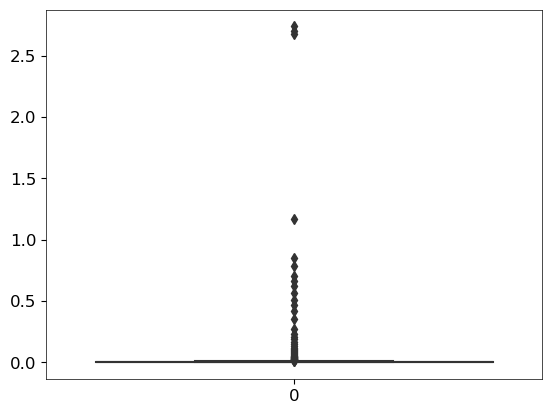

0.9858657243816255


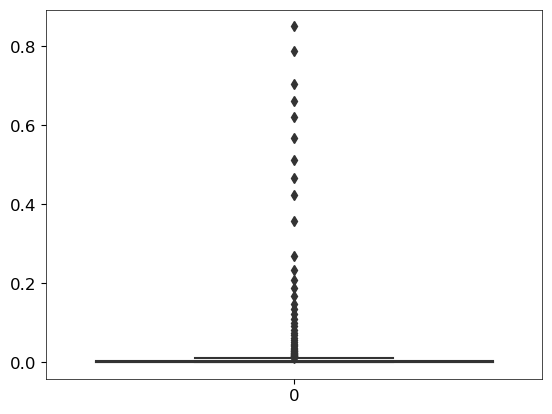

In [ ]:
print(f'Mean: {np.mean(fhat_eigvals)}, Max: {np.max(fhat_eigvals)}, Min: {np.min(fhat_eigvals)}, STD: {np.std(fhat_eigvals)}')
sns.boxplot(fhat_eigvals)
plt.show()
sns.boxplot(fhat_eigvals[fhat_eigvals < 1])
print(len(fhat_eigvals[fhat_eigvals < 1])/len(fhat_eigvals))